<a href="https://colab.research.google.com/github/Ritesh27P/DataAnalysis/blob/main/agreegateAndMergeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn to Aggregate and Merge Data in Pandas while Analysing a Dataset of LEGO Pieces

<img src="https://i.imgur.com/49FNOHj.jpg">

In [ ]:
!mkdir data

In [ ]:
import pandas as pd

In [ ]:
colors = pd.read_csv('data/colors.csv')

In [ ]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [ ]:
colors.shape

(135, 4)

In [ ]:
colors.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_09-59-18-bb72700801f816440f58289b5658841c.png">

In [ ]:
!mkdir data

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("data/sets.csv")
df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
df['year'].min()

1949

In [ ]:
print("The number of products lego company sell in their fist year of opeation is ", df[df['year'] == 1949])

The number of products lego company sell in their fist year of opeation is        set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


In [ ]:
top_num_part = df.sort_values("set_num", ascending=False)
print(" top 5 LEGO sets with the most number of parts is ", top_num_part.head(5))

 top 5 LEGO sets with the most number of parts is              set_num                                 name  year  theme_id  \
15705       wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15691       vwkit-1                       Volkswagen Kit  1959       366   
15669      tsuper-1                    Technic Super Set  1991        12   
15636    trucapam-1               Captain America Mosaic  2016       696   
15620  tominifigs-1            Town Minifig Packs 2-Pack  2000        50   

       num_parts  
15705          0  
15691         22  
15669          0  
15636         72  
15620          0  


Visualise the Number of Sets Published over Time

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sets_by_year = df.groupby("year").count()
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

No handles with labels found to put in legend.


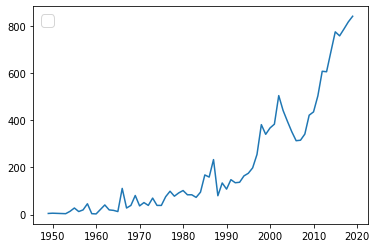

In [ ]:

plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
 
plt.legend(fontsize=16) 

How to use the Pandas .agg() function

In [ ]:
themes_by_year = df.groupby('year').agg({"theme_id": pd.Series.nunique})

In [ ]:
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


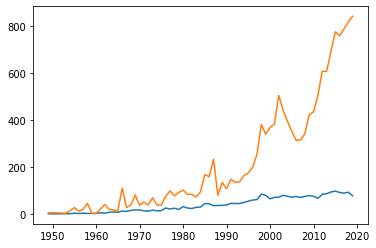

In [ ]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(themes_by_year.index[:-2], sets_by_year.set_num[:-2])

Two Separate Axes

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and ax2 to share the same x-axis. When we plot our data on the axes objects we get this:



Text(0, 0.5, 'Set_num')

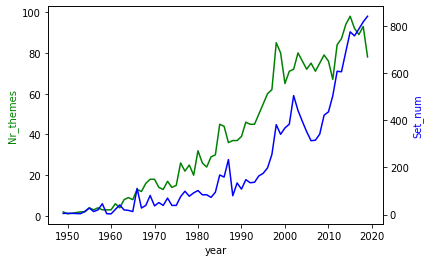

In [ ]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

ax1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'g')
ax2.plot(themes_by_year.index[:-2], sets_by_year.set_num[:-2], 'b')

ax1.set_xlabel("year")
ax1.set_ylabel("Nr_themes", color='green')
ax2.set_ylabel("Set_num", color='blue')


In [ ]:
parts_per_set = df.groupby('year').agg({"num_parts": pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


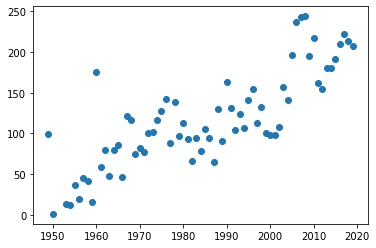

In [ ]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

<img src="https://i.imgur.com/Sg4lcjx.png">

In [ ]:
themes = pd.read_csv("data/themes.csv")
star_war_id = themes[themes.name == "Star Wars"].id

In [ ]:
star_war_id.index

RangeIndex(start=0, stop=596, step=1)

In [ ]:
set_themes_count = df["theme_id"].value_counts()
set_themes_count = pd.DataFrame({"id": set_themes_count.index,
                                 "set_count": set_themes_count.values})
set_themes_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
merged_df = pd.merge(set_themes_count, themes, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

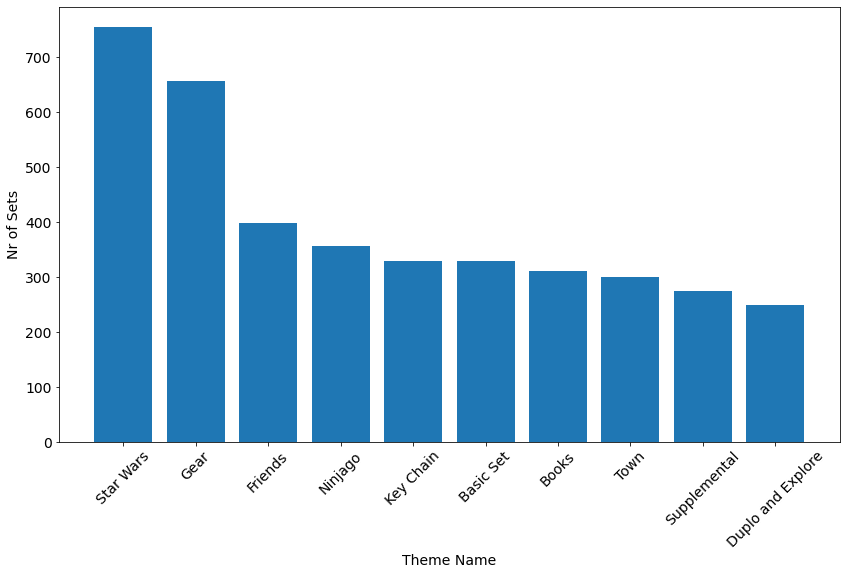

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])